In [1]:
cd ../.. 

C:\Users\user\Documents\dton-wildfires-cleaner


In [2]:
from pprint import pprint
from datetime import timedelta

from sentinelhub import SHConfig
from sentinelhub.time_utils import iso_to_datetime
import matplotlib.pyplot as plt

from air_pollution_processing import process_air_pollution_event
from settings import air_pollution_settings, visualization_settings_air_pollution
from queries import air_pollution_query
from processing.date_utils import get_exact_date, start_of_day, end_of_day
from processing.bbox_utils import create_bbox

from utils import get_env_var
from event_registry_utils import EventRegistry

In [3]:
INSTANCE_ID_AIR_POLLUTION = get_env_var("INSTANCE_ID_AIR_POLLUTION")
EVENT_REGISTRY_API_KEY = get_env_var("EVENT_REGISTRY_API_KEY")
CLIENT_ID = get_env_var("CLIENT_ID")
CLIENT_SECRET = get_env_var("CLIENT_SECRET")

config = SHConfig()
config.sh_client_id = CLIENT_ID
config.sh_client_secret = CLIENT_SECRET
config.instance_id = INSTANCE_ID_AIR_POLLUTION

In [4]:
event_registry = EventRegistry(EVENT_REGISTRY_API_KEY, use_cache=True)

event_id = "eng-6630310"

event = event_registry.get_event(event_id)

* `CHANGE_CUTOFF`: Minimum change that we consider 'significant'. 

Apart from determining whether the change is significant regarding the maximum/average, this value is used to fetch the image on which pinpointing is done. 

Regarding using the 5-day max vs. 30-day average method, a potential improvement would be to calculate the distribution of the 30-day values and then check if the 5-day max and then calculate the sigma of the 5-day max to see if that is unlikely enough. Of course the current approach is probably good enough, this is just in case if we detect some "fake" increases - that would be in the case where the product has a big variance day-to-day and the max value would be a normal maximum of fluctuations.

In [5]:
# Modify these settings
pprint(air_pollution_settings)

{'CALIBRATION_PERIOD_DURATION': 30,
 'CHANGE_CUTOFF': 0.6,
 'EVENT_DURATION': 5,
 'LIMIT_INCLUDED': 0.7,
 'LIMIT_SCORE': 0.7,
 'MAX_CHANGE_PERCENTAGE_CUTOFF': 0.8,
 'N_DAY_MEAN': 3,
 'bbox_dimension': 500000,
 'data_collection': <DataCollection.SENTINEL5P: DataCollectionDefinition(
  api_id: S5PL2
  wfs_id: DSS7
  service_url: https://creodias.sentinel-hub.com
  collection_type: Sentinel-5P
  sensor_type: TROPOMI
  processing_level: L2
  bands: ('AER_AI_340_380', 'AER_AI_354_388', 'CLOUD_BASE_HEIGHT', 'CLOUD_BASE_PRESSURE', 'CLOUD_FRACTION', 'CLOUD_OPTICAL_THICKNESS', 'CLOUD_TOP_HEIGHT', 'CLOUD_TOP_PRESSURE', 'CO', 'HCHO', 'NO2', 'O3', 'SO2', 'CH4')
  is_timeless: False
)>,
 'data_collection_url': 'https://creodias.sentinel-hub.com/api/v1/process',
 'evalscript': <function <lambda> at 0x00000282FE8F6C10>,
 'fis_evalscript': <function <lambda> at 0x00000282FE8F6B80>,
 'fis_layer': 'AER_AI_340_380',
 'fis_resolution': 50000,
 'gases': ['CO',
           'HCHO',
           'NO2',
         

---------------------------------------
---------------------------------------
---------------------------------------


For each product with detected 'significant' change, and image is fetched which has values of change compared to the 30-day average - all the values below `CHANGE_CUTOFF` are ignored (returns 0).

```
//VERSION=3
function setup() {{
  return {{
    input: ["product"],
    output: { bands: 1, sampleType: "FLOAT32" }
  }};
}}
function evaluatePixel(sample) {{
  const change = (sample.product - product_average"])/abs(product_average};
  if (change >= CHANGE_CUTOFF && isFinite(sample.product) && sample.dataMask !== 0) {{
    return [change]
  }}
  return [0];
}}
```

Fetched images are then summed into one image, on which the pinpointing is performed.

Product: CO
Average: 0.04597731544055709
Max value: 0.05240291930063654
Change: 0.1397559600535389
Detected significant change: False
---------------

Product: HCHO
Average: 0.00011385226124360418
Max value: 0.00012239042592005516
Change: 0.07499336932959365
Detected significant change: False
---------------

Product: NO2
Average: 9.893240712185117e-05
Max value: 6.907561236456914e-05
Change: -0.3017898343513323
Detected significant change: False
---------------

Product: O3
Average: 0.1565307682467631
Max value: 0.16263670985897383
Change: 0.03900793231005557
Detected significant change: False
---------------

Product: SO2
Average: 0.0005535943132774396
Max value: 0.00033226137533535674
Change: -0.399810714513535
Detected significant change: False
---------------

Product: CH4
Average: 1885.4184983026414
Max value: 1907.7872721354167
Change: 0.011864089512706568
Detected significant change: False
---------------

Product: AER_AI_340_380
Average: -1.8080787259966813
Max value: -0.72347

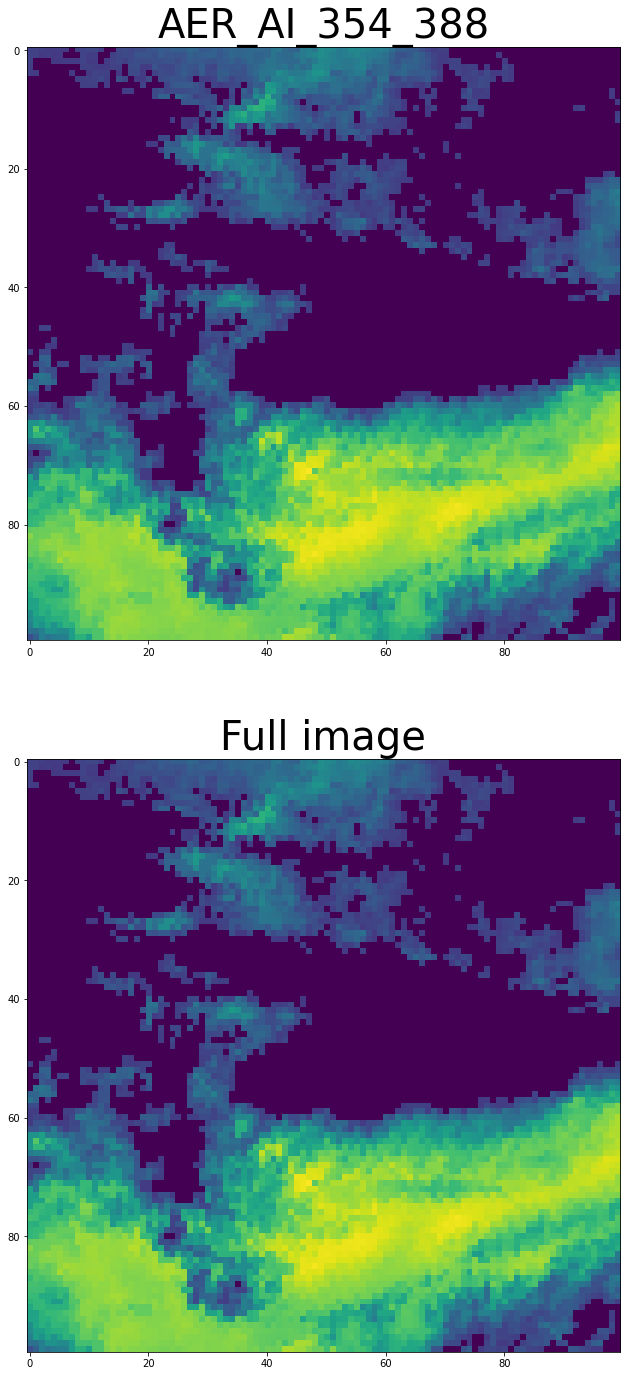

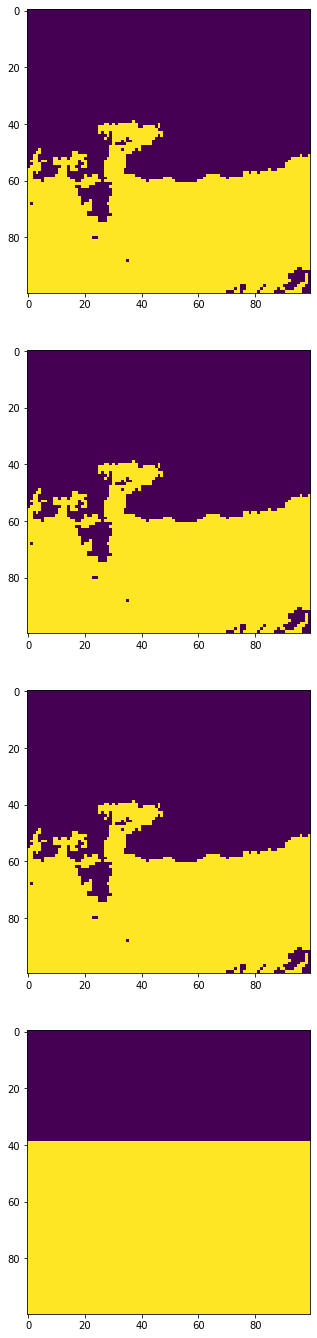

In [6]:
lat, lng, zoom, date, visualization_dates = process_air_pollution_event\
(event, air_pollution_settings, visualization_settings_air_pollution, config, verbose=True)

In [7]:
pprint(visualization_dates)

{'CRE_S5PL2': {'after': '2021-03-15',
               'before': '2021-03-09',
               'productSpecificDates': {'AER_AI_354_388': {'after': '2021-03-15',
                                                           'before': '2021-03-09'}}}}
